In [51]:
#Bibliotheken 

from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
import yfinance as yf
import pypfopt


from pypfopt import risk_models
from pypfopt import plotting
#Aktienauswahl


assets = ['DB','SAP', 'SEDG', 'TSLA','WY','UNFI','DAR','XYL']





In [52]:
assets_data = yf.download(assets, period="max")
prices = assets_data["Adj Close"]
prices.tail()



[*********************100%***********************]  8 of 8 completed


,DAR,DB,SAP,SEDG,TSLA,UNFI,WY,XYL
Date,,,,,,,,
2020-12-28,56.500000,11.19,130.910004,318.410004,663.690002,16.299999,33.709999,100.370003
2020-12-29,56.299999,10.94,129.949997,307.970001,665.989990,15.900000,33.330002,99.510002
2020-12-30,58.880001,10.89,130.639999,319.100006,694.780029,15.850000,33.650002,100.779999
2020-12-31,57.680000,10.90,130.389999,319.119995,705.669983,15.970000,33.529999,101.790001
2021-01-04,56.470001,10.73,129.382507,310.040009,730.750000,16.940001,32.924999,99.385002


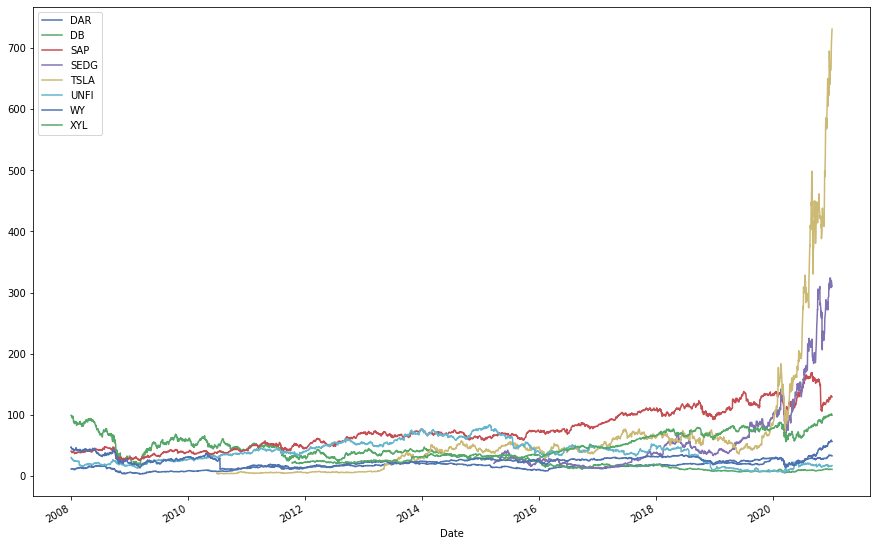

In [53]:
prices[prices.index >= "2008-01-01"].plot(figsize=(15,10));



    


In [54]:
asset_cov = risk_models.sample_cov(prices, frequency=252)
asset_cov



,DAR,DB,SAP,SEDG,TSLA,UNFI,WY,XYL
DAR,0.537527,0.065281,0.037367,0.071021,0.048413,0.028370,0.043134,0.039376
DB,0.065281,0.188271,0.073458,0.071926,0.058830,0.048073,0.070756,0.046718
SAP,0.037367,0.073458,0.161028,0.044314,0.038380,0.033295,0.043620,0.029037
SEDG,0.071021,0.071926,0.044314,0.407775,0.093906,0.040927,0.075765,0.049310
TSLA,0.048413,0.058830,0.038380,0.093906,0.317268,0.025703,0.053051,0.037032
UNFI,0.028370,0.048073,0.033295,0.040927,0.025703,0.246795,0.032899,0.022216
WY,0.043134,0.070756,0.043620,0.075765,0.053051,0.032899,0.111461,0.044822
XYL,0.039376,0.046718,0.029037,0.049310,0.037032,0.022216,0.044822,0.069907


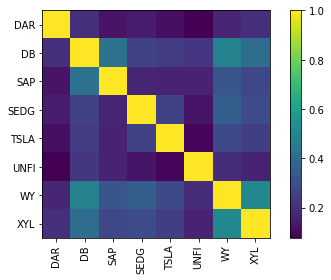

In [55]:
plotting.plot_covariance(asset_cov, plot_correlation=True);






In [56]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(prices)
mu

DAR     0.213412
DB      0.137545
SAP     0.113918
SEDG    0.165773
TSLA    0.135832
UNFI    0.115803
WY      0.122731
XYL     0.076531
Name: mkt, dtype: float64

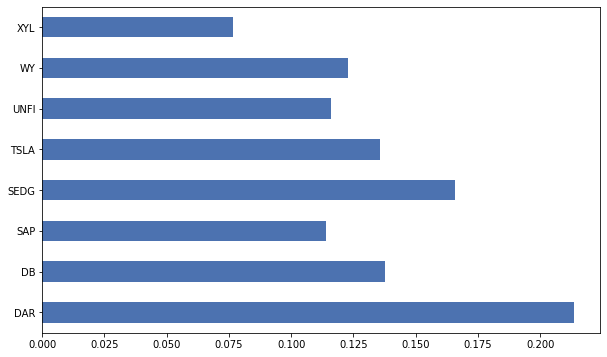

In [57]:
mu.plot.barh(figsize=(10,6));


In [77]:
from pypfopt import EfficientFrontier

ef = EfficientFrontier(mu, asset_cov)
ef.efficient_risk(target_volatility=0.23)
weights = ef.clean_weights()
weights






OrderedDict([('DAR', 0.0492),
             ('DB', 0.0),
             ('SAP', 0.15689),
             ('SEDG', 0.00967),
             ('TSLA', 0.0584),
             ('UNFI', 0.12266),
             ('WY', 0.16105),
             ('XYL', 0.44213)])

In [78]:
ef.portfolio_performance(verbose=True);


Expected annual return: 10.6%
Annual volatility: 23.0%
Sharpe Ratio: 0.37


In [79]:
from pypfopt import CLA, plotting

cla = CLA(mu, asset_cov)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 13.4%
Annual volatility: 26.6%
Sharpe Ratio: 0.43


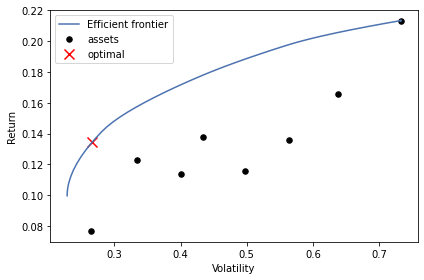

In [80]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)


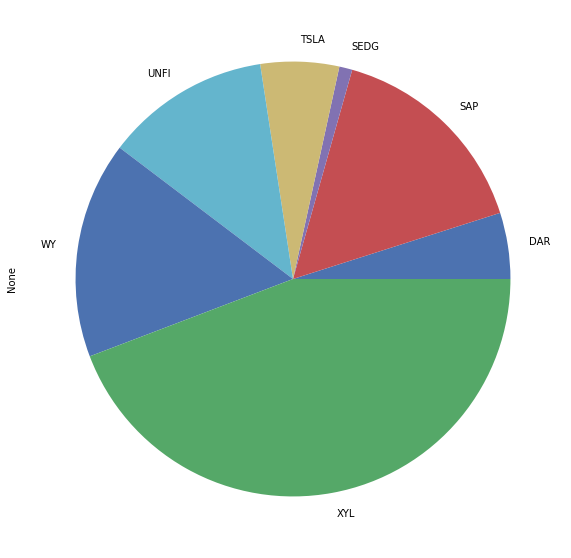

In [81]:
pd.Series(weights).plot.pie(figsize=(10, 10));

